### Advanced Machine Learning

# Home Exercise #2

Assignment Due: 18/04/21 23:59

Jonathan Schler

In [1]:
student1Name="Matan Mizrachi" # student1 name here
student1ID="207299363" # student1 ID here


student2Name="" # student2 name here
student2ID="" # student2 ID here


The goal of this homework is to provide a realistic setting for a machine learning task. Therefore instructions will not specify the exact steps to carry out. Instead, it is part of theassignment to identify promising features, models and preprocessing methods and apply themas appropriate.

The overall goal is to predict whether a specific credit card transaction is fraudulent or not. Please use the data from this dataset provided on Kaggle here:https://www.kaggle.com/kartik2112/fraud-detection. The Kaggle page also contains a description of the dataset. You will use the train set for training the model and test set for validation.

You are free to manipulate the train dataset as you think is appropriate. You do not have to use the wholedataset, you can subsample if you want. While the modelling process is likely iterative, please lay out the  following tasks in the given order to facilitate grading.

## Task 1 Identify Features
Assemble a dataset consisting of features and target (for example in a dataframe or in two arrays X and y). What features are relevant for the prediction task? What features should be excluded because they leak the target information? Show visualizations or statistics to support your selection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

First, let's load the train and test sets. Since the training data and test data are originally separated, we'll assume they are distributed in the same way. 

In [2]:
N = 500 * 10**3

x_train = pd.read_csv('fraudTrain.csv', index_col=0)
y_train = x_train['is_fraud']
x_train.drop(columns=['is_fraud'], inplace=True)

x_test = pd.read_csv('fraudTest.csv', index_col=0)
y_test = x_test['is_fraud']
x_test.drop(columns=['is_fraud'], inplace=True)
x_train.head()

c:\Users\tomda\source\pytho\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459


In [3]:
categorical = x_train.dtypes == object
x_train.loc[:, categorical] = x_train.loc[:, categorical].apply(lambda x: x.astype('category'))
x_test.loc[:, categorical] = x_test.loc[:, categorical].apply(lambda x: x.astype('category'))

In [4]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   trans_date_trans_time  1296675 non-null  category
 1   cc_num                 1296675 non-null  int64   
 2   merchant               1296675 non-null  category
 3   category               1296675 non-null  category
 4   amt                    1296675 non-null  float64 
 5   first                  1296675 non-null  category
 6   last                   1296675 non-null  category
 7   gender                 1296675 non-null  category
 8   street                 1296675 non-null  category
 9   city                   1296675 non-null  category
 10  state                  1296675 non-null  category
 11  zip                    1296675 non-null  int64   
 12  lat                    1296675 non-null  float64 
 13  long                   1296675 non-null  float64 
 14  ci

Now, let's visualize the data, in order to detect leaky/relevant features.

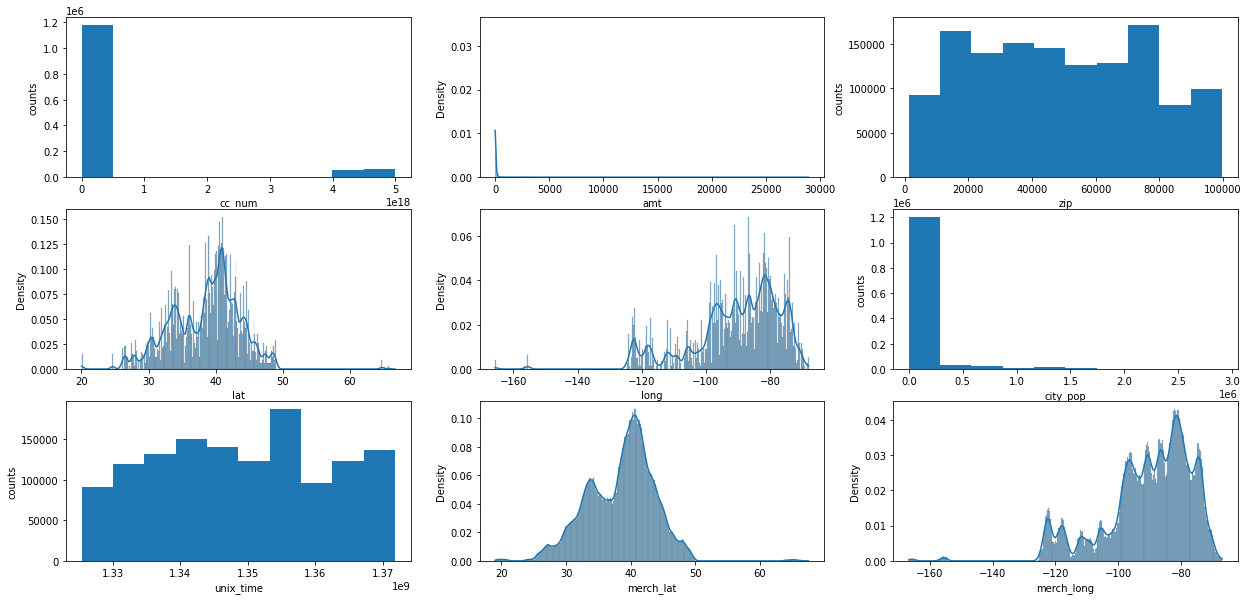

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(21,10))
cols = x_train.columns
i = 0
for c in cols:
    if x_train.dtypes[c] == 'int64':
        axes[i//3,i%3].hist(x_train.loc[x_train[c].isna() == False,c].to_numpy())
        axes[i//3,i%3].set_xlabel(c)
        axes[i//3,i%3].set_ylabel('counts')
        i += 1
    elif x_train.dtypes[c] == 'float64':
        sns.histplot(data=x_train, x=c, discrete=False, ax=axes[i//3,i%3], kde=True, stat='density')
        i+=1

plt.show()

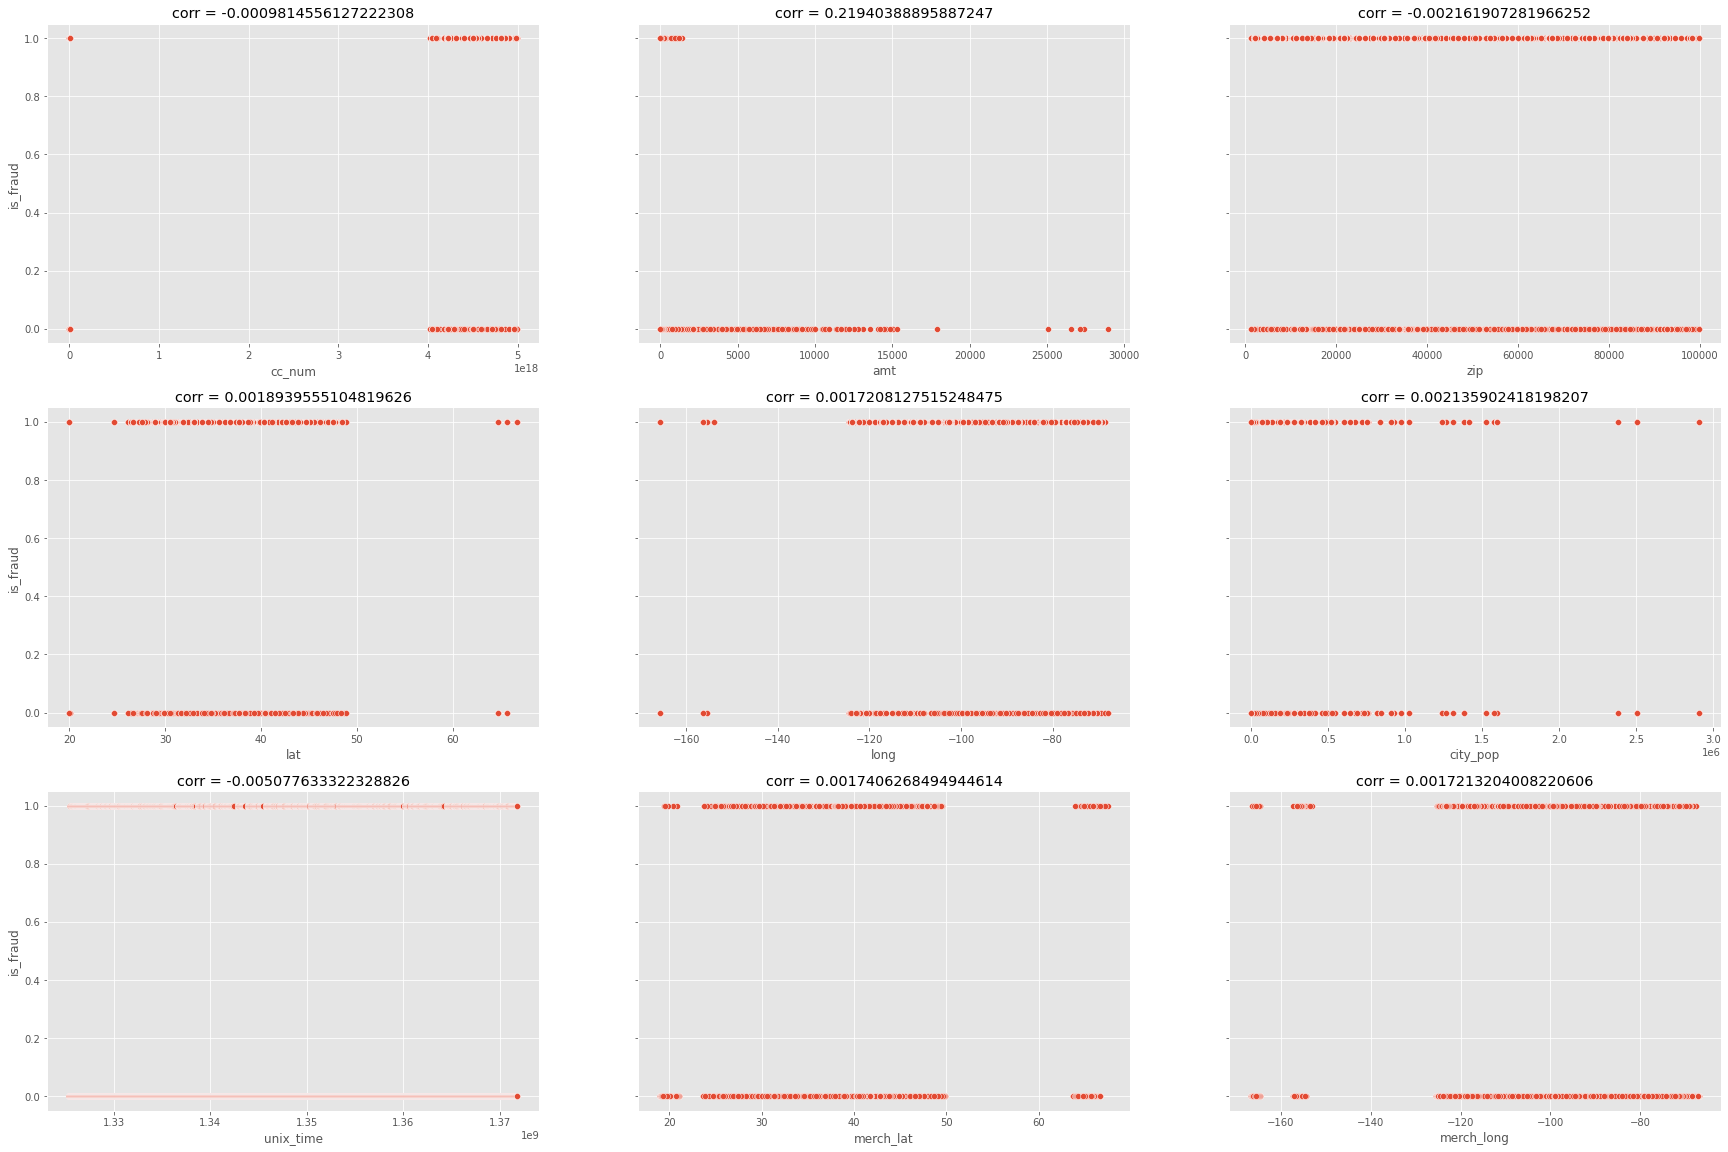

In [6]:
plt.style.use('ggplot')
temp_df = x_train.copy()
temp_df['is_fraud'] = y_train.copy()
corr = temp_df.corr()

fig, axes = plt.subplots(3, 3, figsize=(30,20), sharey=True)
i = 0
for c in cols:
    if x_train.dtypes[c] == 'int64' or x_train.dtypes[c] == 'float64':
        axes[i//3,i%3].set_title(f'corr = {corr.loc[c, "is_fraud"]}')
        sns.scatterplot(x=c, y="is_fraud", data=temp_df, ax=axes[i//3,i%3])
        i += 1

plt.show()
fig = axes = None

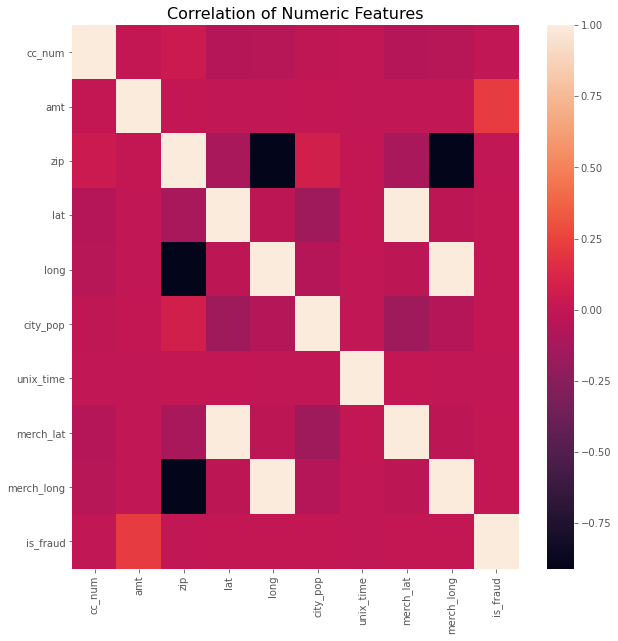

In [7]:
plt.figure(figsize=(10, 10))
plt.title('Correlation of Numeric Features',y=1,size=16)
sns.heatmap(corr, vmax=1, ax=plt.gca())
plt.show()

It is clear that the _long_ feature is very problematic in terms of statistical dependency with other features, as it is highly correlated with the _zip_ and _merch_long_ features. As for the _lat_ feature, which is highly correlated with _merch_lat_. 
Hence, we'd like to give up on these features.

In [8]:
cols = x_train.columns
x_train.drop(columns=['long', 'lat'], inplace=True)
x_test.drop(columns=['long', 'lat'], inplace=True)
cols = cols.drop(['long', 'lat'])
temp_df = None

In [9]:
x_train['zip'] = x_train['zip'].astype('category')
x_test['zip'] = x_test['zip'].astype('category')
categorical = x_train.dtypes == 'category'

Let's try to find the important features:

In [12]:
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest

In [20]:
tx_train: pd.DataFrame = x_train.copy()[:N] # N = 500K
ty_train = y_train.copy()[:N]
#tx_train.loc[:, categorical] =  tx_train.loc[:, categorical].apply(lambda x: x.cat.codes)

In [29]:
temp_df = tx_train.loc[:, categorical].copy().apply(lambda x: x.cat.codes)
scores = SelectKBest(chi2, k='all')
scores.fit(temp_df, ty_train)
temp_df = None

In [33]:
temp_df = pd.DataFrame()
temp_df['column'] = cols[categorical]
temp_df['$\chi^2$'] = scores.scores_
temp_df

,column,$\chi^2$
0,trans_date_trans_time,-4.665765e+10
1,merchant,4.911753e+02
2,category,5.009941e+02
3,first,1.172499e+03
4,last,8.120486e+01
5,gender,2.761882e+00
6,street,2.031113e+02
7,city,6.286474e+02
8,state,7.543995e+01
9,zip,1.151671e+03


In [35]:
scores = SelectKBest(mutual_info_classif, k='all')
temp_df = tx_train.copy()
temp_df.loc[:, categorical] = temp_df.loc[:, categorical].apply(lambda x: x.cat.codes)
scores.fit(temp_df, ty_train)
temp_df = pd.DataFrame()
temp_df['column'] = cols
temp_df['MI'] = scores.scores_
temp_df

,column,MI
0,trans_date_trans_time,0.007064
1,cc_num,0.009756
2,merchant,0.002821
3,category,0.010514
4,amt,0.018030
5,first,0.004339
6,last,0.005106
7,gender,0.025145
8,street,0.010155
9,city,0.009248


Based on the results, it is safe to say that _trans_num_ holds no information regarding the target value, therefore, it is a redundant feature.
As for the others, we'll have to figure out whether those are leaky or informative features.

In [41]:
x_train.drop(columns=['trans_num'], inplace=True)
x_test.drop(columns=['trans_num'], inplace=True)
cols = cols.drop(['trans_num'])
temp_df = None
categorical = x_train.dtypes == 'category'

In [45]:
tx_train = ty_train = None

We'll now take a look on the numeric data's distributions/stats, as this might help us to detect leaky/important features.

In [68]:
from scipy import stats
temp_df = x_train.loc[:, ~categorical].copy()
is_fraud = y_train == 1
temp_df.head()

,cc_num,amt,city_pop,unix_time,merch_lat,merch_long
0,2703186189652095,4.97,3495,1325376018,36.011293,-82.048315
1,630423337322,107.23,149,1325376044,49.159047,-118.186462
2,38859492057661,220.11,4154,1325376051,43.150704,-112.154481
3,3534093764340240,45.00,1939,1325376076,47.034331,-112.561071
4,375534208663984,41.96,99,1325376186,38.674999,-78.632459


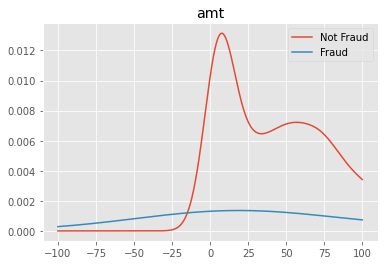

In [66]:
dens = stats.kde.gaussian_kde(temp_df.loc[~is_fraud]['amt'])
x = np.arange(-100, 100, 0.1)
plt.plot(x, dens(x), label='Not Fraud')
dens = stats.kde.gaussian_kde(temp_df.loc[is_fraud]['amt'])
plt.plot(x, dens(x), label='Fraud')
plt.title('amt')
plt.legend()
plt.show()

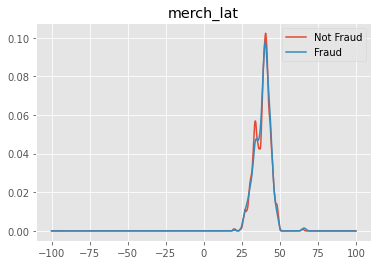

In [69]:
dens = stats.kde.gaussian_kde(temp_df.loc[~is_fraud]['merch_lat'])
x = np.arange(-100, 100, 0.1)
plt.plot(x, dens(x), label='Not Fraud')
dens = stats.kde.gaussian_kde(temp_df.loc[is_fraud]['merch_lat'])
plt.plot(x, dens(x), label='Fraud')
plt.title('merch_lat')
plt.legend()
plt.show()

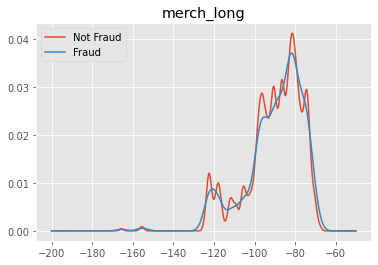

In [71]:
dens = stats.kde.gaussian_kde(temp_df.loc[~is_fraud]['merch_long'])
x = np.arange(-200, -50, 0.1)
plt.plot(x, dens(x), label='Not Fraud')
dens = stats.kde.gaussian_kde(temp_df.loc[is_fraud]['merch_long'])
plt.plot(x, dens(x), label='Fraud')
plt.title('merch_long')
plt.legend()
plt.show()
dens = x = None


In [73]:
pd.concat([temp_df.loc[~is_fraud]['cc_num'].describe(), temp_df.loc[is_fraud]['cc_num'].describe()], axis=1)

,cc_num,cc_num
count,1.289169e+06,7.506000e+03
mean,4.172901e+17,4.003577e+17
std,1.308990e+18,1.276871e+18
min,6.041621e+10,6.041621e+10
25%,1.800429e+14,1.800429e+14
50%,3.521417e+15,3.528041e+15
75%,4.642255e+15,4.651007e+15
max,4.992346e+18,4.992346e+18


In [74]:
pd.concat([temp_df.loc[~is_fraud]['city_pop'].describe(), temp_df.loc[is_fraud]['city_pop'].describe()], axis=1)


,city_pop,city_pop
count,1.289169e+06,7.506000e+03
mean,8.877523e+04,9.727676e+04
std,3.018065e+05,3.265815e+05
min,2.300000e+01,2.300000e+01
25%,7.430000e+02,7.465000e+02
50%,2.456000e+03,2.623000e+03
75%,2.032800e+04,2.143700e+04
max,2.906700e+06,2.906700e+06


In [75]:
pd.concat([temp_df.loc[~is_fraud]['unix_time'].describe(), temp_df.loc[is_fraud]['unix_time'].describe()], axis=1)


,unix_time,unix_time
count,1.289169e+06,7.506000e+03
mean,1.349249e+09,1.348389e+09
std,1.283514e+07,1.383020e+07
min,1.325376e+09,1.325466e+09
25%,1.338759e+09,1.335744e+09
50%,1.349254e+09,1.348872e+09
75%,1.359378e+09,1.360021e+09
max,1.371817e+09,1.371787e+09


In [56]:
temp_df = None

This seems like _amt_ could make an important feature to a predictive model, as the answer to the question "is this Transaction fraudulent?" effects
the data distribution massively.
We also understand that there is a huge difference between the amount of fraudulent variables to non-fraudulent variables. Hence, we'll have to take care of it before we move forward.

In [2]:
!pip install imbalanced-learn

In [11]:
from imblearn.over_sampling import SMOTE

temp_df = x_train.copy()
temp_df.loc[:, categorical] = temp_df.loc[:, categorical].apply(lambda _x: _x.cat.codes)

x_train_new, y_train_new = SMOTE().fit_resample(temp_df, y_train)

In [45]:
x_train_new.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,unix_time,merch_lat,merch_long
0,0,2703186189652095,514,8,4.97,162,18,0,568,526,27,28654,3495,370,779,1325376018,36.011293,-82.048315
1,1,630423337322,241,4,107.23,309,157,0,435,612,47,99160,149,428,607,1325376044,49.159047,-118.186462
2,2,38859492057661,390,0,220.11,115,381,1,602,468,13,83252,4154,307,302,1325376051,43.150704,-112.154481
3,3,3534093764340240,360,2,45.00,163,463,1,930,84,26,59632,1939,328,397,1325376076,47.034331,-112.561071
4,4,375534208663984,297,9,41.96,336,149,1,418,216,45,24433,99,116,734,1325376186,38.674999,-78.632459


In [17]:
np.unique(y_train_new, return_counts=True)[1]

array([1289169, 1289169], dtype=int64)

In [42]:
New_N = np.append(np.arange(0, 250 * 10 ** 3), np.arange(len(y_train_new) - 250 * 10 ** 3, len(y_train_new)))
np.unique(y_train_new[New_N], return_counts=True)[1]

array([248047, 251953], dtype=int64)

In [54]:
np.sum(x_train_new.copy().isna())

trans_date_trans_time        0
cc_num                       0
merchant                     0
category                     0
amt                          0
first                        0
last                         0
gender                       0
street                       0
city                         0
state                        0
zip                      12893
city_pop                     0
job                          0
dob                          0
unix_time                    0
merch_lat                    0
merch_long                   0
dtype: int64

Now, as could be seen above, the data is balanced, although there are some missing values, and we'd like to take care of that moving forward.

In [64]:
#%%capture
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

temp_df = x_train_new.copy().iloc[New_N, :]
index = ~temp_df['zip'].isna()
cols = x_train.columns
temp_df = temp_df.loc[index]

results = pd.DataFrame(data=[], index=cols)

for i, c in enumerate(cols):
    test_df = temp_df.drop(columns=[c], inplace=False)
    res = cross_validate(RandomForestClassifier(n_estimators=50), test_df, y_train_new[New_N][index], cv=3, scoring = ('accuracy', 'roc_auc', 'average_precision'))
    results.loc[c, ['Accuracy', 'AUC', 'Precision']] = np.array([np.mean(res['test_accuracy']), np.mean(res['test_roc_auc']), np.mean(res['test_average_precision'])])
    
test_df = temp_df = res = index = None

In [65]:
results

,Accuracy,AUC,Precision
trans_date_trans_time,0.574122,0.964177,0.950953
cc_num,0.505272,0.827295,0.779873
merchant,0.505724,0.819507,0.770615
category,0.504988,0.808460,0.765407
amt,0.504876,0.813513,0.766028
first,0.505808,0.787561,0.741517
last,0.505342,0.806197,0.756232
gender,0.505632,0.775023,0.726167
street,0.506283,0.798723,0.753123
city,0.504968,0.822418,0.776244


The thing we tried to do here is to detect leaky features, using a Random Forest Classifier model and a feature dropout, and we couldn't actually find any.
However, we can observe an interesting phenomenon; When _unix_time_ or _trans_date_trans_time_ are being dropped, the AUC rises significantly, only the significance seems to be similar.  

That fact could mean that maybe one of these features is redundent.

In [67]:
pd.concat([pd.to_datetime(x_train['unix_time'], unit='s'), x_train['trans_date_trans_time']], axis=1)

,unix_time,trans_date_trans_time
0,2012-01-01 00:00:18,2019-01-01 00:00:18
1,2012-01-01 00:00:44,2019-01-01 00:00:44
2,2012-01-01 00:00:51,2019-01-01 00:00:51
3,2012-01-01 00:01:16,2019-01-01 00:01:16
4,2012-01-01 00:03:06,2019-01-01 00:03:06
...,...,...
1296670,2013-06-21 12:12:08,2020-06-21 12:12:08
1296671,2013-06-21 12:12:19,2020-06-21 12:12:19
1296672,2013-06-21 12:12:32,2020-06-21 12:12:32
1296673,2013-06-21 12:13:36,2020-06-21 12:13:36


As could be seen, these two features are, in fact, the same, so we might as well just keep one of them.

## Task 2 Preprocessing and Baseline Model

Create a simple minimum viable model by doing an initial selection of features, doing appropriate preprocessing and cross-validating a linear model. Feel free to generously exclude features or do simplified preprocessing for this task. As mentioned before, you don’t need to validate the model on the whole dataset

In [1]:
!pip install imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE

In [9]:
x_train = pd.read_csv('fraudTrain.csv', index_col=0)
y_train = x_train['is_fraud']
x_train.drop(columns=['is_fraud', 'long', 'lat', 'trans_num', 'unix_time'], inplace=True)

x_test = pd.read_csv('fraudTest.csv', index_col=0)
y_test = x_test['is_fraud']
x_test.drop(columns=['is_fraud', 'long', 'lat', 'trans_num', 'unix_time'], inplace=True)
x_train.head()

c:\Users\tomda\source\pytho\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,city_pop,job,dob,merch_lat,merch_long
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,47.034331,-112.561071
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459


In [10]:
categorical = x_train.dtypes == object
x_train['zip'] = x_train['zip'].astype(object)
x_train.loc[:, categorical] = x_train.loc[:, categorical].apply(lambda x: x.astype('category'))
x_test.loc[:, categorical] = x_test.loc[:, categorical].apply(lambda x: x.astype('category'))


temp_df = x_train.copy()
temp_df.loc[:, categorical] = temp_df.loc[:, categorical].apply(lambda _x: _x.cat.codes)

x_train_new, y_train_new = SMOTE().fit_resample(temp_df, y_train)
temp_df = None


New_N = np.append(np.arange(0, 50 * 10 ** 3), np.arange(len(y_train_new) - 50 * 10 ** 3, len(y_train_new)))
cols = x_train.columns

The previous blocks was meant to allow us to begin this task, right away, in case of kernel restart, without going through the whole blocks from the first task.
We now want to build our baseline model. 

In [11]:
np.unique(y_train_new[New_N], return_counts=True)[1]

array([49552, 50448], dtype=int64)

In [12]:
np.sum(x_train_new.isna())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
city_pop                 0
job                      0
dob                      0
merch_lat                0
merch_long               0
dtype: int64

In [13]:
x_train = y_train = None

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

In [15]:
x_train_new.drop(columns=['trans_date_trans_time', 'cc_num'], inplace=True)
x_test.drop(columns=['trans_date_trans_time', 'cc_num'], inplace=True)
cols = cols.drop(['trans_date_trans_time', 'cc_num'])

In [16]:
x_test.loc[:, categorical] = x_test.loc[:, categorical].apply(lambda _x: _x.cat.codes)

In [ ]:
x_train_new.append(x_test)

## Task 3 Feature Engineering
Create derived features and perform more in-depth preprocessing and data cleaning. Does this improve your model? In particular, think about how to encode categorical variables.

## Task 4 Any model
Use any classification model we discussed (trees, forests, boosting, SVM) to improve your result. You can (and probably should) change your preprocessing and feature engineering to be suitable for the model. You are not required to try all of these models. Tune parameters as appropriate

## Task 5 Feature Selections
Identify features that are important for your best model. Which features are most influential,and which features could be removed without decrease in performance? Does removing irrelevant features make your model better?

## Task 6 An explainable model
Can you create an “explainable” model that is nearly as good as your best model? An explainable model should be small enough to be easily inspected - say a linear model withfew enough coefficients that you can reasonable look at all of them, or a tree with a smallnumber of leafs etc.